# TP2_B - Regressão logística em portas lógicas

Bem vindo!
Neste TP você implementará uma regressão logística.

**Instruções:**
- Use a versão Python 3.
- Evite sempre usar usar laços `for` e `while`, fazer contas no formato vetorial é sempre mais rápido.
- Não apague os comentários que já existem nas células de código. Mas é claro que você pode adicionar outros comentários.

**Objetivos**
- Implementar regressão logística para classificar "portas lógicas"
- Aplicar o algoritmo de gradiente descendente
- Verificar na prática a funcionalidade do algoritmo

## O Jupyter notebook

O Jupyter Notebook é um ambiente interativo de programação em uma página web. Nesse notebook você colocará o código entre os comentários `### SEU CÓDIGO COMEÇA AQUI ###` e `### FIM DO CÓDIGO ###`. Após escrever o código, você pode executar a célula com `Shift+Enter` ou no botão "Run" (com símbolo de "play") na barra de comandos acima.

Em alguns trechos será especificado "(≈ X linhas de código)" nos comentários para que você tenha uma ideia sobre o tamanho do código a ser desenvolvido naquele trecho. Lembrando que é só uma estimativa, o seu código pode ficar maior ou menor do que o especificado.

**Alguns atalhos úteis *no código*:**
- `Ctrl+Enter`: executa a célula e mantém o cursor na mesma célula
- `Shift+Enter`: executa a célula e move o cursor para a próxima célula
- `Ctrl+/`: comenta a linha de código
- `Shift+Tab`: quando o cursor estiver em uma função, mostra um HELP da função

**Alguns atalhos úteis *na célula*:**
- Cria nova célula `a`: acima, `b`: abaixo da céula selecionada
- `d` (2x): deleta célula selecionada
- `m`: define célula como texto (Markdown)
- `y`: define célula como código (Python)
- `l`: mostra numeração das linhas na célula de código
- `c`: copiar, `v`: colar, `x`: recortar célula selecionada
- `ctrl+shift+p`: mostra busca para todos comandos de célula

## Gerando dados
O código abaixo gera um conjunto de dados com 100 amostras, $m=100$, de um problema de classificação. Primeiramente, você ajustará, manualmente, uma rede neural que consiga classificar os dados abaixo.

1. Rode o código abaixo e observe que as classes não são linearmente separáveis na maioria das realizações (cada vez que o código é rodado, são sorteados novos dados)

Obs.: essa parte é só rodar o código abaixo, não precisa escrever nada na célula abaixo.

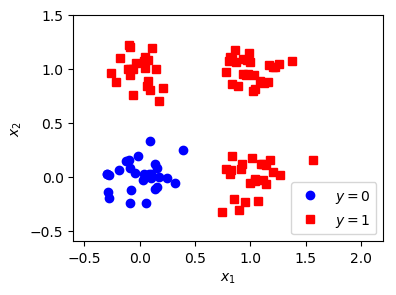

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# dados de treinamento
m = 100
x1_tr = np.random.randint(2, size=m)
x2_tr = np.random.randint(2, size=m)
y_tr = np.logical_or(x1_tr, x2_tr).astype(int)
x1_tr = x1_tr + np.random.normal(0, .15, m) # adicionando ruído
x2_tr = x2_tr + np.random.normal(0, .15, m) # adicionando ruído

plt.figure(figsize=(4,3), dpi=100)
plt.plot(x1_tr[y_tr<.5], x2_tr[y_tr<.5], 'o', c='blue')
plt.plot(x1_tr[y_tr>.5], x2_tr[y_tr>.5], 's', c='red')

plt.legend(('$y=0$','$y=1$'))
plt.xlim((-.6, 2.2))
plt.ylim((-.6, 1.5))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

___

## Modelo logístico

Nessa parte você implementará o modelo de regressão logística.
1. O modelo classificador será um único neurônio com a ***função logística*** dada por: $\hat{y}^{(i)}= \sigma\left(w_1 x_1^{(i)} + w_2 x_2^{(i)} + b\right)$, em que $\sigma(v)=1/(1+e^{-v})$
1. Note que, nesse modelo, a saída é um número que representa a probabilidade de pertencer à classe $y=1$, i.e., $\hat{y}=P(y=1\,|\,x)$, sendo que uma saída $\hat{y}=0$ significa certeza absoluta do algoritmo que a saída é da classe "zero"; e $\hat{y}=1$ indica certeza de pertencer à classe "um"

Crie agora a função `neuLog()` que fará o papel do neurônio com função de ativação logística. Essa função calculará a saída do modelo, baseado nos dados de entrada e nos valores dos parâmetros. A equação do perceptron de camada única é dada por:

$\hat{y}^{(i)}= \sigma\left(w_1 x_1^{(i)} + w_2 x_2^{(i)} + b\right)$

1. Nome da função:
  + `neuLog(x1, x2, w1, w2, b)`
1. Entradas:
  + $x1$: valor da primeira entrada, escalar, no formato `type(x1)=float`
  + $x2$: valor da segunda entrada, escalar, no formato `type(x2)=float`
  + $w1$: primeiro valor de peso, escalar, no formato `type(w1)=float`
  + $w2$: segundo valor de peso, escalar, no formato `type(w2)=float`
  + $b$: valor do parâmetro bias, escalar, no formato `type(b)=float`
1. Saída:
  + $\hat{y}$: saída estimada pelo modelo, escalar, no formato `type(yh)=float`

A função deve fazer o seguinte:
   + calcular $\hat{y}$ a partir das entradas $x_1$ e $x_2$, e a partir dos parâmetros $w_1$, $w_2$ e $b$.

Ao final, teste a função usando os parâmetros $w_1=1$, $w_2=0$ e $b=0$, com a segunda entrada fixa em $x_2=0$. Para $x_1$, teste em três situações:
1. $x_1\approx\infty$ (i.e., um número muito grande): em que espera-se uma saída $\hat{y}\approx 1$
1. $x_1\approx -\infty$ (i.e., um número muito negativo): em que espera-se uma saída $\hat{y}\approx -1$
1. $x_1=0$: em que espera-se $\hat{y}=0,5$

Teste cada caso acima e dê um `print` após cada resultado.

In [9]:
### SEU CÓDIGO COMEÇA AQUI ###

### FIM DO CÓDIGO ###

**Saída esperada**

yh ≈ 1 (aproximadamente)

yh ≈ 0 (aproximadamente)

yh = 0.5
___

## Treinamento do modelo logístico

Nessa parte do trabalho você fará a implementação do treinamento dos parâmetros $w1$, $w2$ e $b$ do modelo de regressão logística, baseado nos dados de treinamento. Implemente o código de aprendizado do gradiente descendente visto em aula. Note que, na aula, foi mostrado um passo do algoritmo (uma "época"). Seu código deve executar `N` épocas de treinamento. Note que `N` deve ser uma variável no seu código, para que você teste livremente a influência desse número no aprendizado do modelo.

Durante o treinamento, você deve calcular a função custo, $J(w_1, w_2, b)$ para cada época. Ao final do treinamento, você deve mostrar um gráfico de $J(w_1, w_2, b)$ pelo número de épocas de treinamento.

Como feito anteriormente, você deve gerar 50 amostras de validação (copie a forma de gerar dados da primeira parte) e fazer um gráfico mostrando todos os dados de teste (como foi feito na primeira parte desta atividade) e o limiar de separação. Note que, para o modelo logístico, se considerarmos $\hat{y}>0,5$ sendo da classe "1" e $\hat{y}<0,5$ sendo da classe "0", teremos o limiar de separação calculado da mesma forma da primeira parte do trabalho, i.e., com $v=0$. Ou seja, a forma de mostrar o limiar de separação dos dados é a mesma da primeira parte do TP2. Use essa informação para plotar o limiar de separabilidade dos dados.

Espera-se dois gráficos ao final do código abaixo: i) função custo pelo número de épocas de treinamento; e ii) gráfico mostrando os dados de entrada e o respectivo limiar de separação do algoritmo.

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###

### FIM DO CÓDIGO ###

**Saída esperada**:
- Gráfico 1: valor da função custo $J$ para cada época. O gráfico de ter no *eixo horizontal*: número da "época"; e no *eixo vertical*: valor da função custo calculada nos dados de treinamento.
- Gráfico 2: gráfico das entradas, similar ao da primeira parte desta atividade, mas mostrando também o limiar de separação do modelo treinado.
___

## Desafio! (opcional, você não perderá nenhum ponto se deixar de fazer essa parte)

Se este trabalho foi fácil para você até aqui, você pode tentar um novo desafio: utilizar o algoritmo de aprendizado implementado nos dados da Iris. Esses dados podem ser obtidos no site https://archive.ics.uci.edu/ml/datasets/Iris, que contém também uma descrição mais completa do problema.

Implemente o algoritmo de aprendizado fazendo os ajustes necessários. Ao final, mostre o ressultado do algoritmo de aprendizado para os **dados de validação**. Não se esqueça de segregar o conjunto de dados em: treinamento (~80%) e validação (~20%). Mostre o percentual de acerto nesses dados.

Bom trabalho!

In [ ]:
### SEU CÓDIGO COMEÇA AQUI ###

### FIM DO CÓDIGO ###

**Saída esperada**:
- Índice de acerto nos dados de validação.
- Gráfico de função custo vs épocas de treinamento
___



# Conclusões

Escreva aqui, em linguagem `markdown`, suas considerações sobre o que foi aprendido nesse trabalho prático.

*### escreva aqui ###*